<a href="https://colab.research.google.com/github/sugiyama404/acrobot/blob/main/make_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

In [14]:
df1 = pd.read_csv('LnMlpPolicy_win.csv', names=['LnMlpPolicy'])
df2 = pd.read_csv('MlpPolicy_win.csv', names=['MlpPolicy'])
df_i = pd.concat([df1, df2], axis=1)
df_i['num'] =  [0,25000,50000,75000,100000,125000,150000]
df = df_i.set_index('num')
df

,LnMlpPolicy,MlpPolicy
num,,
0,20,20
25000,20,91
50000,117,20
75000,114,109
100000,122,118
125000,23,117
150000,114,124


In [24]:
def spline_interp(in_x, in_y):
    out_x = np.linspace(np.min(in_x), np.max(in_x), np.size(in_x)*100) # もとのxの個数より多いxを用意
    func_spline = interp1d(in_x, in_y, kind='cubic') # cubicは3次のスプライン曲線
    out_y = func_spline(out_x) # func_splineはscipyオリジナルの型

    return out_x, out_y

In [28]:
def moving_avg(in_x, in_y):
    np_y_conv = np.convolve(in_y, np.ones(3)/float(3), mode='valid') # 畳み込む
    out_x_dat = np.linspace(np.min(in_x), np.max(in_x), np.size(np_y_conv))

    return out_x_dat, np_y_conv

In [32]:
x = df.index.values
y = df['LnMlpPolicy']

out_x, out_y = moving_avg(x,y)

x2 = df.index.values
y2 = df['MlpPolicy']

out_x2, out_y2 = moving_avg(x2,y2)

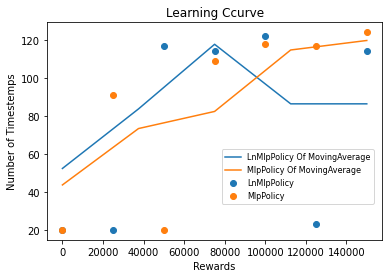

In [49]:
plt.plot(out_x, out_y, label="LnMlpPolicy Of MovingAverage")
plt.plot(out_x2, out_y2, label="MlpPolicy Of MovingAverage")

plt.scatter(x=df.index, y=df['LnMlpPolicy'], label="LnMlpPolicy")
plt.scatter(x=df.index, y=df['MlpPolicy'], label="MlpPolicy")

plt.title("Learning Ccurve")
plt.xlabel("Rewards")
plt.ylabel("Number of Timestemps")
plt.legend(bbox_to_anchor=(1, 0.13), loc='lower right', borderaxespad=1, fontsize=8)

plt.show()